Training Start
Epoch: 0001, cost = 0.220859238
Epoch: 0002, cost = 0.061503784
Epoch: 0003, cost = 0.045652724
Epoch: 0004, cost = 0.036145988
Epoch: 0005, cost = 0.029300309
Epoch: 0006, cost = 0.025042436
Epoch: 0007, cost = 0.021656723
Epoch: 0008, cost = 0.018627647
Epoch: 0009, cost = 0.014555011
Epoch: 0010, cost = 0.013002810
Training Finished
Accuracy: 0.9908999800682068


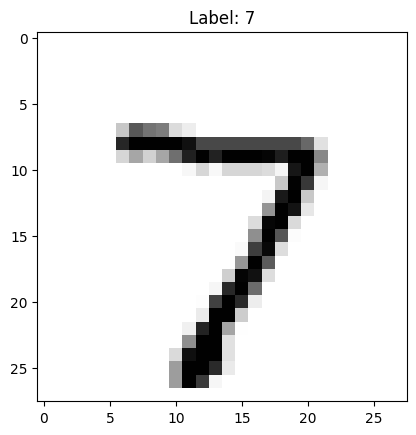

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. 데이터 로딩 및 전처리
transform = transforms.Compose([
    transforms.ToTensor()
])
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=10000, shuffle=False)

# 2. 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # 2x2 pooling
        self.fc = nn.Linear(64 * 7 * 7, 10)  # == Linear(3136, 10) ← 수정됨

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # (B, 32, 14, 14)
        x = self.pool(torch.relu(self.conv2(x)))  # (B, 64, 7, 7)
        x = x.view(x.size(0), -1)  # flatten → (B, 3136)
        x = self.fc(x)  # fully connected → (B, 10)
        return x

model = CNN()

# 3. 손실 함수 및 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 학습
epochs = 10
print("Training Start")
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch: {epoch+1:04d}, cost = {total_loss/len(train_loader):.9f}")
print("Training Finished")

# 5. 정확도 측정
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predictions = torch.argmax(outputs, 1)
        accuracy = (predictions == labels).float().mean()
        print("Accuracy:", accuracy.item())

# 6. 이미지 출력
plt.imshow(images[0][0], cmap='Greys')  # [0][0] → (1,28,28) 중 첫 채널만
plt.title(f"Label: {labels[0].item()}")
plt.show()
